# Stacking
- **스태킹(Stacking)**은 앙상블 학습 기법 중 하나로, 여러 개의 기본 모델(Base Models)의 예측 결과를 결합하여 최종 모델(Meta Model)이 예측하도록 하는 방식입니다. **배깅(Bagging)**이나 **부스팅(Boosting)**과는 달리, 스태킹은 다양한 유형의 모델을 결합할 수 있습니다.

### 앙상블 기법 비교

| **특징**               | **배깅(Bagging)**                              | **부스팅(Boosting)**                              | **스태킹(Stacking)**                             | **보팅(Voting)**                                 |
|-------------------------|----------------------------------------------|-----------------------------------------------|-----------------------------------------------|-----------------------------------------------|
| **학습 방식**            | 여러 모델을 독립적으로 학습                    | 오류를 수정하도록 모델을 순차적으로 학습             | 메타 모델을 통해 예측을 결합                     | 가중치 또는 다수결 투표를 통해 예측을 결합          |
| **모델 간 의존성**        | 독립적으로 학습                                 | 종속적(이전 모델의 오류를 기반으로 학습)            | 독립적인 기본 모델들을 메타 모델로 결합             | 독립적으로 학습                                  |
| **다양성**              | 일반적으로 동일한 알고리즘 사용                 | 순차적 개선에 초점                              | 서로 다른 알고리즘 사용 가능                     | 서로 다른 알고리즘 사용 가능                     |
| **주요 목표**           | 분산(Variance) 감소                            | 편향(Bias) 감소                                | 모델 다양성을 결합하여 더 나은 예측 제공           | 예측을 결합하여 견고성(Robustness) 강화           |
| **결합 방법**           | 다수결 투표(분류) 또는 평균화(회귀)             | 예측의 가중치 합산                              | 메타 모델을 통한 예측                            | 다수결 또는 가중치 투표                           |
| **예시**               | 랜덤포레스트, BaggingClassifier               | AdaBoost, Gradient Boosting, XGBoost           | 랜덤포레스트, 로지스틱 회귀를 메타 모델로 사용      | Hard Voting, Soft Voting                       |
| **활용 사례**           | 의사결정 트리와 같은 고분산 모델               | 편향 감소가 중요한 경우                         | 다양한 모델이 가능한 복잡한 작업                   | 전반적인 견고성 강화가 필요한 일반적인 작업         |


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

Stacking Accuracy: 0.97


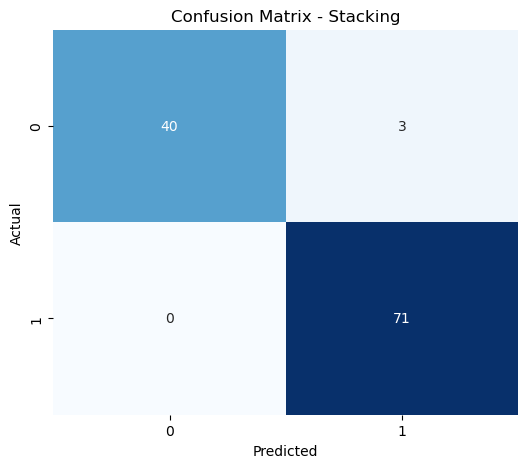

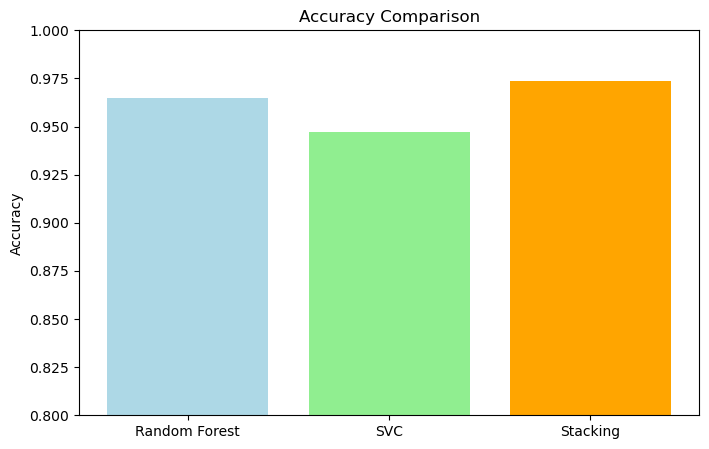

In [6]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
]

# Define meta model
meta_model = LogisticRegression()

# Create Stacking Classifier
stacking = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train Stacking Classifier
stacking.fit(X_train, y_train)

# Predict and evaluate
y_pred = stacking.predict(X_test)
print(f"Stacking Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Stacking")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Compare Predictions (Base Models vs Stacking)
rf_model = base_models[0][1]  # Random Forest
svc_model = base_models[1][1]  # SVC

# Train base models independently
rf_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)

# Predict using base models
rf_pred = rf_model.predict(X_test)
svc_pred = svc_model.predict(X_test)

# Accuracy Comparison
rf_acc = accuracy_score(y_test, rf_pred)
svc_acc = accuracy_score(y_test, svc_pred)
stacking_acc = accuracy_score(y_test, y_pred)

# Visualization of Accuracy Comparison
models = ['Random Forest', 'SVC', 'Stacking']
accuracies = [rf_acc, svc_acc, stacking_acc]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['lightblue', 'lightgreen', 'orange'])
plt.ylim(0.8, 1)
plt.title("Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()